<a href="https://colab.research.google.com/github/wandering719/tryplace-public-/blob/main/SparkDataFrame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#注意事項:
#當您執行本Notebook的程式後，如果你要關閉Notebook，請選擇選單: File > Close and Halt    才能確實停止目前正在執行的程式，並且釋放資源
#如果您沒有使用以上方法，只關閉此分頁，程式仍在執行，未釋放資源，當您開啟並執行其他的Notebook時，可能會發生錯誤

In [ ]:
sc.master

Out[1]: 'local[8]'

In [ ]:
global Path    
if sc.master[0:5]=="local" :
   Path="/FileStore/tables/"
else:   
   Path="hdfs://master:9000/user/hduser/"
#如果您要在cluster模式執行(hadoop yarn 或Spark Stand alone)，請依照書上說明，先上傳檔案至HDFS目

# 19.3	建立RDD、DataFrame與Spark SQL tempTable

In [ ]:
#Step 1  讀取文字檔,建立RDD

In [ ]:
RawUserRDD= sc.textFile(Path+"u.user")

In [ ]:
RawUserRDD.count()

Out[4]: 943

In [ ]:
RawUserRDD.take(5)

Out[5]: ['1|24|M|technician|85711',
 '2|53|F|other|94043',
 '3|23|M|writer|32067',
 '4|24|M|technician|43537',
 '5|33|F|other|15213']

In [ ]:
userRDD =RawUserRDD.map(lambda line: line.split("|"))
userRDD .take(5)

Out[6]: [['1', '24', 'M', 'technician', '85711'],
 ['2', '53', 'F', 'other', '94043'],
 ['3', '23', 'M', 'writer', '32067'],
 ['4', '24', 'M', 'technician', '43537'],
 ['5', '33', 'F', 'other', '15213']]

# 建立DataFrame

In [ ]:
#from pyspark.sql import SQLContext
#sqlContex=SQLContext(sc)

In [ ]:
from pyspark.sql import SparkSession
sqlContext = SparkSession.builder.getOrCreate()

In [ ]:
from pyspark.sql import Row
user_Rows = userRDD.map(lambda p:
     Row(
         userid=int(p[0]), 
         age=int(p[1]),
         gender=p[2],
         occupation=p[3],
         zipcode=p[4]
    )
)
user_Rows.take(5)

Out[8]: [Row(age=24, gender='M', occupation='technician', userid=1, zipcode='85711'),
 Row(age=53, gender='F', occupation='other', userid=2, zipcode='94043'),
 Row(age=23, gender='M', occupation='writer', userid=3, zipcode='32067'),
 Row(age=24, gender='M', occupation='technician', userid=4, zipcode='43537'),
 Row(age=33, gender='F', occupation='other', userid=5, zipcode='15213')]

In [ ]:
user_df = sqlContext.createDataFrame(user_Rows)
user_df .printSchema()

root
-- age: long (nullable = true)
-- gender: string (nullable = true)
-- occupation: string (nullable = true)
-- userid: long (nullable = true)
-- zipcode: string (nullable = true)

In [ ]:
user_df.show(5)

+---+------+----------+------+-------+
age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
 24| M|technician| 1| 85711|
 53| F| other| 2| 94043|
 23| M| writer| 3| 32067|
 24| M|technician| 4| 43537|
 33| F| other| 5| 15213|
+---+------+----------+------+-------+
only showing top 5 rows

In [ ]:
df=user_df.alias("df")
df.show(5)

+---+------+----------+------+-------+
age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
 24| M|technician| 1| 85711|
 53| F| other| 2| 94043|
 23| M| writer| 3| 32067|
 24| M|technician| 4| 43537|
 33| F| other| 5| 15213|
+---+------+----------+------+-------+
only showing top 5 rows

# 建立Spark SQL tempTable

In [ ]:
user_df.registerTempTable("user_table")

In [ ]:
sqlContext.sql(" SELECT count(*) counts FROM user_table").show()

+------+
counts|
+------+
 943|
+------+

In [ ]:
sqlContext.sql("""
SELECT count(*) counts 
FROM   user_table
""").show()

+------+
counts|
+------+
 943|
+------+

In [ ]:
sqlContext.sql(" SELECT *  FROM user_table ").show(1000)

+---+------+-------------+------+-------+
age|gender| occupation|userid|zipcode|
+---+------+-------------+------+-------+
 24| M| technician| 1| 85711|
 53| F| other| 2| 94043|
 23| M| writer| 3| 32067|
 24| M| technician| 4| 43537|
 33| F| other| 5| 15213|
 42| M| executive| 6| 98101|
 57| M|administrator| 7| 91344|
 36| M|administrator| 8| 05201|
 29| M| student| 9| 01002|
 53| M| lawyer| 10| 90703|
 39| F| other| 11| 30329|
 28| F| other| 12| 06405|
 47| M| educator| 13| 29206|
 45| M| scientist| 14| 55106|
 49| F| educator| 15| 97301|
 21| M|entertainment| 16| 10309|
 30| M| programmer| 17| 06355|
 35| F| other| 18| 37212|
 40| M| librarian| 19| 02138|
 42| F| homemaker| 20| 95660|
 26| M| writer| 21| 30068|
 25| M| writer| 22| 40206|
 30| F| artist| 23| 48197|
 21| F| artist| 24| 94533|
 39| M| engineer| 25| 55107|
 49| M| engineer| 26| 21044|
 40| F| librarian| 27| 30030|
 32| M| writer| 28| 55369|
 41| M| programmer| 29| 94043|
 7| M| student| 30| 55436|
 24| M| artist| 31| 10003|
 28| F| student| 32| 78741|
 23| M| student| 33| 27510|
 38| F|administrator| 34| 42141|
 20| F| homemaker| 35| 42459|
 19| F| student| 36| 93117|
 23| M| student| 37| 55105|
 28| F| other| 38| 54467|
 41| M|entertainment| 39| 01040|
 38| M| scientist| 40| 27514|
 33| M| engineer| 41| 80525|
 30| M|administrator| 42| 17870|
 29| F| librarian| 43| 20854|
 26| M| technician| 44| 46260|
 29| M| programmer| 45| 50233|
 27| F| marketing| 46| 46538|
 53| M| marketing| 47| 07102|
 45| M|administrator| 48| 12550|
 23| F| student| 49| 76111|
 21| M| writer| 50| 52245|
 28| M| educator| 51| 16509|
 18| F| student| 52| 55105|
 26| M| programmer| 53| 55414|
 22| M| executive| 54| 66315|
 37| M| programmer| 55| 01331|
 25| M| librarian| 56| 46260|
 16| M| none| 57| 84010|
 27| M| programmer| 58| 52246|
 49| M| educator| 59| 08403|
 50| M| healthcare| 60| 06472|
 36| M| engineer| 61| 30040|
 27| F|administrator| 62| 97214|
 31| M| marketing| 63| 75240|
 32| M| educator| 64| 43202|
 51| F| educator| 65| 48118|
 23| M| student| 66| 80521|
 17| M| student| 67| 60402|
 19| M| student| 68| 22904|
 24| M| engineer| 69| 55337|
 27| M| engineer| 70| 60067|
 39| M| scientist| 71| 98034|
 48| F|administrator| 72| 73034|
 24| M| student| 73| 41850|
 39| M| scientist| 74| T8H1N|
 24| M|entertainment| 75| 08816|
 20| M| student| 76| 02215|
 30| M| technician| 77| 29379|
 26| M|administrator| 78| 61801|
 39| F|administrator| 79| 03755|
 34| F|administrator| 80| 52241|
 21| M| student| 81| 21218|
 50| M| programmer| 82| 22902|
 40| M| other| 83| 44133|
 32| M| executive| 84| 55369|
 51| M| educator| 85| 20003|
 26| M|administrator| 86| 46005|
 47| M|administrator| 87| 89503|
 49| F| librarian| 88| 11701|
 43| F|administrator| 89| 68106|
 60| M| educator| 90| 78155|
 55| M| marketing| 91| 01913|
 32| M|entertainment| 92| 80525|
 48| M| executive| 93| 23112|
 26| M| student| 94| 71457|
 31| M|administrator| 95| 10707|
 25| F| artist| 96| 75206|
 43| M| artist| 97| 98006|
 49| F| executive| 98| 90291|
 20| M| student| 99| 63129|
 36| M| executive| 100| 90254|
 15| M| student| 101| 05146|
 38| M| programmer| 102| 30220|
 26| M| student| 103| 55108|
 27| M| student| 104| 55108|
 24| M| engineer| 105| 94043|
 61| M| retired| 106| 55125|
 39| M| scientist| 107| 60466|
 44| M| educator| 108| 63130|
 29| M| other| 109| 55423|
 19| M| student| 110| 77840|
 57| M| engineer| 111| 90630|
 30| M| salesman| 112| 60613|
 47| M| executive| 113| 95032|
 27| M| programmer| 114| 75013|
 31| M| engineer| 115| 17110|
 40| M| healthcare| 116| 97232|
 20| M| student| 117| 16125|
 21| M|administrator| 118| 90210|
 32| M| programmer| 119| 67401|
 47| F| other| 120| 06260|
 54| M| librarian| 121| 99603|
 32| F| writer| 122| 22206|
 48| F| artist| 123| 20008|
 34| M| student| 124| 60615|
 30| M| lawyer| 125| 22202|
 28| F| lawyer| 126| 20015|
 33| M| none| 127| 73439|
 24| F| marketing| 128| 20009|
 36| F| marketing| 129| 07039|
 20| M| none| 130| 60115|
 59| F|administrator| 131| 15237|
 24| M| ot

In [ ]:
sqlContext.sql(" SELECT *  FROM user_table").show(5)

+---+------+----------+------+-------+
age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
 24| M|technician| 1| 85711|
 53| F| other| 2| 94043|
 23| M| writer| 3| 32067|
 24| M|technician| 4| 43537|
 33| F| other| 5| 15213|
+---+------+----------+------+-------+
only showing top 5 rows

In [ ]:
sqlContext.sql(" SELECT *  FROM user_table LIMIT 100").show(1000)

+---+------+-------------+------+-------+
age|gender| occupation|userid|zipcode|
+---+------+-------------+------+-------+
 24| M| technician| 1| 85711|
 53| F| other| 2| 94043|
 23| M| writer| 3| 32067|
 24| M| technician| 4| 43537|
 33| F| other| 5| 15213|
 42| M| executive| 6| 98101|
 57| M|administrator| 7| 91344|
 36| M|administrator| 8| 05201|
 29| M| student| 9| 01002|
 53| M| lawyer| 10| 90703|
 39| F| other| 11| 30329|
 28| F| other| 12| 06405|
 47| M| educator| 13| 29206|
 45| M| scientist| 14| 55106|
 49| F| educator| 15| 97301|
 21| M|entertainment| 16| 10309|
 30| M| programmer| 17| 06355|
 35| F| other| 18| 37212|
 40| M| librarian| 19| 02138|
 42| F| homemaker| 20| 95660|
 26| M| writer| 21| 30068|
 25| M| writer| 22| 40206|
 30| F| artist| 23| 48197|
 21| F| artist| 24| 94533|
 39| M| engineer| 25| 55107|
 49| M| engineer| 26| 21044|
 40| F| librarian| 27| 30030|
 32| M| writer| 28| 55369|
 41| M| programmer| 29| 94043|
 7| M| student| 30| 55436|
 24| M| artist| 31| 10003|
 28| F| student| 32| 78741|
 23| M| student| 33| 27510|
 38| F|administrator| 34| 42141|
 20| F| homemaker| 35| 42459|
 19| F| student| 36| 93117|
 23| M| student| 37| 55105|
 28| F| other| 38| 54467|
 41| M|entertainment| 39| 01040|
 38| M| scientist| 40| 27514|
 33| M| engineer| 41| 80525|
 30| M|administrator| 42| 17870|
 29| F| librarian| 43| 20854|
 26| M| technician| 44| 46260|
 29| M| programmer| 45| 50233|
 27| F| marketing| 46| 46538|
 53| M| marketing| 47| 07102|
 45| M|administrator| 48| 12550|
 23| F| student| 49| 76111|
 21| M| writer| 50| 52245|
 28| M| educator| 51| 16509|
 18| F| student| 52| 55105|
 26| M| programmer| 53| 55414|
 22| M| executive| 54| 66315|
 37| M| programmer| 55| 01331|
 25| M| librarian| 56| 46260|
 16| M| none| 57| 84010|
 27| M| programmer| 58| 52246|
 49| M| educator| 59| 08403|
 50| M| healthcare| 60| 06472|
 36| M| engineer| 61| 30040|
 27| F|administrator| 62| 97214|
 31| M| marketing| 63| 75240|
 32| M| educator| 64| 43202|
 51| F| educator| 65| 48118|
 23| M| student| 66| 80521|
 17| M| student| 67| 60402|
 19| M| student| 68| 22904|
 24| M| engineer| 69| 55337|
 27| M| engineer| 70| 60067|
 39| M| scientist| 71| 98034|
 48| F|administrator| 72| 73034|
 24| M| student| 73| 41850|
 39| M| scientist| 74| T8H1N|
 24| M|entertainment| 75| 08816|
 20| M| student| 76| 02215|
 30| M| technician| 77| 29379|
 26| M|administrator| 78| 61801|
 39| F|administrator| 79| 03755|
 34| F|administrator| 80| 52241|
 21| M| student| 81| 21218|
 50| M| programmer| 82| 22902|
 40| M| other| 83| 44133|
 32| M| executive| 84| 55369|
 51| M| educator| 85| 20003|
 26| M|administrator| 86| 46005|
 47| M|administrator| 87| 89503|
 49| F| librarian| 88| 11701|
 43| F|administrator| 89| 68106|
 60| M| educator| 90| 78155|
 55| M| marketing| 91| 01913|
 32| M|entertainment| 92| 80525|
 48| M| executive| 93| 23112|
 26| M| student| 94| 71457|
 31| M|administrator| 95| 10707|
 25| F| artist| 96| 75206|
 43| M| artist| 97| 98006|
 49| F| executive| 98| 90291|
 20| M| student| 99| 63129|
 36| M| executive| 100| 90254|
+---+------+-------------+------+-------+

# 19.3	顯示部分欄位

In [ ]:
userRDDnew= userRDD.map(lambda x: (x[0],x[3],x[2] ,x[1]) )
userRDDnew.take(5)

Out[20]: [('1', 'technician', 'M', '24'),
 ('2', 'other', 'F', '53'),
 ('3', 'writer', 'M', '23'),
 ('4', 'technician', 'M', '24'),
 ('5', 'other', 'F', '33')]

In [ ]:
user_df.select("userid","occupation","gender","age").show(100)

+------+-------------+------+---+
userid| occupation|gender|age|
+------+-------------+------+---+
 1| technician| M| 24|
 2| other| F| 53|
 3| writer| M| 23|
 4| technician| M| 24|
 5| other| F| 33|
 6| executive| M| 42|
 7|administrator| M| 57|
 8|administrator| M| 36|
 9| student| M| 29|
 10| lawyer| M| 53|
 11| other| F| 39|
 12| other| F| 28|
 13| educator| M| 47|
 14| scientist| M| 45|
 15| educator| F| 49|
 16|entertainment| M| 21|
 17| programmer| M| 30|
 18| other| F| 35|
 19| librarian| M| 40|
 20| homemaker| F| 42|
 21| writer| M| 26|
 22| writer| M| 25|
 23| artist| F| 30|
 24| artist| F| 21|
 25| engineer| M| 39|
 26| engineer| M| 49|
 27| librarian| F| 40|
 28| writer| M| 32|
 29| programmer| M| 41|
 30| student| M| 7|
 31| artist| M| 24|
 32| student| F| 28|
 33| student| M| 23|
 34|administrator| F| 38|
 35| homemaker| F| 20|
 36| student| F| 19|
 37| student| M| 23|
 38| other| F| 28|
 39|entertainment| M| 41|
 40| scientist| M| 38|
 41| engineer| M| 33|
 42|administrator| M| 30|
 43| librarian| F| 29|
 44| technician| M| 26|
 45| programmer| M| 29|
 46| marketing| F| 27|
 47| marketing| M| 53|
 48|administrator| M| 45|
 49| student| F| 23|
 50| writer| M| 21|
 51| educator| M| 28|
 52| student| F| 18|
 53| programmer| M| 26|
 54| executive| M| 22|
 55| programmer| M| 37|
 56| librarian| M| 25|
 57| none| M| 16|
 58| programmer| M| 27|
 59| educator| M| 49|
 60| healthcare| M| 50|
 61| engineer| M| 36|
 62|administrator| F| 27|
 63| marketing| M| 31|
 64| educator| M| 32|
 65| educator| F| 51|
 66| student| M| 23|
 67| student| M| 17|
 68| student| M| 19|
 69| engineer| M| 24|
 70| engineer| M| 27|
 71| scientist| M| 39|
 72|administrator| F| 48|
 73| student| M| 24|
 74| scientist| M| 39|
 75|entertainment| M| 24|
 76| student| M| 20|
 77| technician| M| 30|
 78|administrator| M| 26|
 79|administrator| F| 39|
 80|administrator| F| 34|
 81| student| M| 21|
 82| programmer| M| 50|
 83| other| M| 40|
 84| executive| M| 32|
 85| educator| M| 51|
 86|administrator| M| 26|
 87|administrator| M| 47|
 88| librarian| F| 49|
 89|administrator| F| 43|
 90| educator| M| 60|
 91| marketing| M| 55|
 92|entertainment| M| 32|
 93| executive| M| 48|
 94| student| M| 26|
 95|administrator| M| 31|
 96| artist| F| 25|
 97| artist| M| 43|
 98| executive| F| 49|
 99| student| M| 20|
 100| executive| M| 36|
+------+-------------+------+---+
only showing top 100 rows

In [ ]:
user_df.select( user_df.userid, user_df.occupation,user_df.gender,user_df.age ).show(5)

+------+----------+------+---+
userid|occupation|gender|age|
+------+----------+------+---+
 1|technician| M| 24|
 2| other| F| 53|
 3| writer| M| 23|
 4|technician| M| 24|
 5| other| F| 33|
+------+----------+------+---+
only showing top 5 rows

In [ ]:
df.select(df.userid,df.occupation,df.gender,df.age).show(5)

+------+----------+------+---+
userid|occupation|gender|age|
+------+----------+------+---+
 1|technician| M| 24|
 2| other| F| 53|
 3| writer| M| 23|
 4|technician| M| 24|
 5| other| F| 33|
+------+----------+------+---+
only showing top 5 rows

In [ ]:
user_df.select(user_df.userid, user_df.occupation,df.gender,df.age ).show(5)

+------+----------+------+---+
userid|occupation|gender|age|
+------+----------+------+---+
 1|technician| M| 24|
 2| other| F| 53|
 3| writer| M| 23|
 4|technician| M| 24|
 5| other| F| 33|
+------+----------+------+---+
only showing top 5 rows

In [ ]:
df[df['userid'],df['occupation'],df['gender'],df['age']  ].show(5)

+------+----------+------+---+
userid|occupation|gender|age|
+------+----------+------+---+
 1|technician| M| 24|
 2| other| F| 53|
 3| writer| M| 23|
 4|technician| M| 24|
 5| other| F| 33|
+------+----------+------+---+
only showing top 5 rows

In [ ]:
sqlContext.sql(" SELECT userid,occupation,gender,age  FROM user_table").show(5)

+------+----------+------+---+
userid|occupation|gender|age|
+------+----------+------+---+
 1|technician| M| 24|
 2| other| F| 53|
 3| writer| M| 23|
 4|technician| M| 24|
 5| other| F| 33|
+------+----------+------+---+
only showing top 5 rows

# 19.4 增加計算欄位

In [ ]:
userRDDnew= userRDD.map(lambda x: (x[0],x[3],x[2],x[1] ,2016-int(x[1])) )
userRDDnew.take(5)

Out[28]: [('1', 'technician', 'M', '24', 1992),
 ('2', 'other', 'F', '53', 1963),
 ('3', 'writer', 'M', '23', 1993),
 ('4', 'technician', 'M', '24', 1992),
 ('5', 'other', 'F', '33', 1983)]

In [ ]:
df.select("userid","occupation","gender","age",2016-df.age).show(5)

+------+----------+------+---+------------+
userid|occupation|gender|age|(2016 - age)|
+------+----------+------+---+------------+
 1|technician| M| 24| 1992|
 2| other| F| 53| 1963|
 3| writer| M| 23| 1993|
 4|technician| M| 24| 1992|
 5| other| F| 33| 1983|
+------+----------+------+---+------------+
only showing top 5 rows

In [ ]:
df.select("userid","occupation","gender","age",(2016-df.age).alias("birthyear")).show(5)

+------+----------+------+---+---------+
userid|occupation|gender|age|birthyear|
+------+----------+------+---+---------+
 1|technician| M| 24| 1992|
 2| other| F| 53| 1963|
 3| writer| M| 23| 1993|
 4|technician| M| 24| 1992|
 5| other| F| 33| 1983|
+------+----------+------+---+---------+
only showing top 5 rows

In [ ]:
sqlContext.sql("""
SELECT userid,occupation,gender,age,2016-age birthyear 
FROM user_table""").show(5)

+------+----------+------+---+---------+
userid|occupation|gender|age|birthyear|
+------+----------+------+---+---------+
 1|technician| M| 24| 1992|
 2| other| F| 53| 1963|
 3| writer| M| 23| 1993|
 4|technician| M| 24| 1992|
 5| other| F| 33| 1983|
+------+----------+------+---+---------+
only showing top 5 rows

# 19.5篩選資料

In [ ]:
userRDD.filter(lambda r:   r[3]=='technician' and r[2]=='M' and r[1]=='24').take(6)    

Out[32]: [['1', '24', 'M', 'technician', '85711'],
 ['4', '24', 'M', 'technician', '43537'],
 ['456', '24', 'M', 'technician', '31820'],
 ['717', '24', 'M', 'technician', '84105'],
 ['832', '24', 'M', 'technician', '77042'],
 ['889', '24', 'M', 'technician', '78704']]

In [ ]:
user_df.filter("occupation='technician' ").filter("gender='M' ").filter("age=24").show()

+---+------+----------+------+-------+
age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
 24| M|technician| 1| 85711|
 24| M|technician| 4| 43537|
 24| M|technician| 456| 31820|
 24| M|technician| 717| 84105|
 24| M|technician| 832| 77042|
 24| M|technician| 889| 78704|
+---+------+----------+------+-------+

In [ ]:
user_df.filter("occupation='technician' and gender='M' and age=24").show()

+---+------+----------+------+-------+
age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
 24| M|technician| 1| 85711|
 24| M|technician| 4| 43537|
 24| M|technician| 456| 31820|
 24| M|technician| 717| 84105|
 24| M|technician| 832| 77042|
 24| M|technician| 889| 78704|
+---+------+----------+------+-------+

In [ ]:
df.filter((df.occupation=='technician' ) & (df.gender=='M' ) & (df.age==24)).show()

+---+------+----------+------+-------+
age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
 24| M|technician| 1| 85711|
 24| M|technician| 4| 43537|
 24| M|technician| 456| 31820|
 24| M|technician| 717| 84105|
 24| M|technician| 832| 77042|
 24| M|technician| 889| 78704|
+---+------+----------+------+-------+

In [ ]:
df.filter((df['occupation']=='technician' ) & (df['gender']=='M' ) & (df['age']==24)).show()

+---+------+----------+------+-------+
age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
 24| M|technician| 1| 85711|
 24| M|technician| 4| 43537|
 24| M|technician| 456| 31820|
 24| M|technician| 717| 84105|
 24| M|technician| 832| 77042|
 24| M|technician| 889| 78704|
+---+------+----------+------+-------+

In [ ]:
#Step3 使用Spark SQL 篩選資料

In [ ]:
sqlContext.sql(
'''SELECT *  
FROM user_table 
where occupation='technician' and   gender='M' and age=24''').show(5)

+---+------+----------+------+-------+
age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
 24| M|technician| 1| 85711|
 24| M|technician| 4| 43537|
 24| M|technician| 456| 31820|
 24| M|technician| 717| 84105|
 24| M|technician| 832| 77042|
+---+------+----------+------+-------+
only showing top 5 rows

# 19.6 篩選資料

In [ ]:
#Step1 使用多個filter篩選資料
user_df.filter("occupation='technician' ").filter("gender='M' ").filter("age=24").show(5)

+---+------+----------+------+-------+
age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
 24| M|technician| 1| 85711|
 24| M|technician| 4| 43537|
 24| M|technician| 456| 31820|
 24| M|technician| 717| 84105|
 24| M|technician| 832| 77042|
+---+------+----------+------+-------+
only showing top 5 rows

In [ ]:
user_df.filter("occupation='technician' and gender='M' and age=24").show()

+---+------+----------+------+-------+
age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
 24| M|technician| 1| 85711|
 24| M|technician| 4| 43537|
 24| M|technician| 456| 31820|
 24| M|technician| 717| 84105|
 24| M|technician| 832| 77042|
 24| M|technician| 889| 78704|
+---+------+----------+------+-------+

In [ ]:
user_df.filter(user_df.occupation=='technician' ).filter(user_df.gender=='M' ).filter(user_df.age==24).show()

+---+------+----------+------+-------+
age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
 24| M|technician| 1| 85711|
 24| M|technician| 4| 43537|
 24| M|technician| 456| 31820|
 24| M|technician| 717| 84105|
 24| M|technician| 832| 77042|
 24| M|technician| 889| 78704|
+---+------+----------+------+-------+

In [ ]:
user_df.filter((df.occupation=='technician' ) & (df.gender=='M' ) & (df.age==24)).show()

+---+------+----------+------+-------+
age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
 24| M|technician| 1| 85711|
 24| M|technician| 4| 43537|
 24| M|technician| 456| 31820|
 24| M|technician| 717| 84105|
 24| M|technician| 832| 77042|
 24| M|technician| 889| 78704|
+---+------+----------+------+-------+

In [ ]:
df.filter((df['occupation']=='technician' ) & (df['gender']=='M' ) &  (df['age']==24)).show()

+---+------+----------+------+-------+
age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
 24| M|technician| 1| 85711|
 24| M|technician| 4| 43537|
 24| M|technician| 456| 31820|
 24| M|technician| 717| 84105|
 24| M|technician| 832| 77042|
 24| M|technician| 889| 78704|
+---+------+----------+------+-------+

# 19.6 單一欄位排序資料

In [ ]:
userRDD.takeOrdered(5, key = lambda x: int(x[1]))

Out[38]: [['30', '7', 'M', 'student', '55436'],
 ['471', '10', 'M', 'student', '77459'],
 ['289', '11', 'M', 'none', '94619'],
 ['142', '13', 'M', 'other', '48118'],
 ['609', '13', 'F', 'student', '55106']]

In [ ]:
userRDD.takeOrdered(5, key = lambda x: -1*int(x[1]))

Out[39]: [['481', '73', 'M', 'retired', '37771'],
 ['767', '70', 'M', 'engineer', '00000'],
 ['803', '70', 'M', 'administrator', '78212'],
 ['860', '70', 'F', 'retired', '48322'],
 ['559', '69', 'M', 'executive', '10022']]

In [ ]:
sqlContext.sql("""
SELECT userid,occupation,gender,age   
FROM user_table 
ORDER BY age""").show(5)

+------+----------+------+---+
userid|occupation|gender|age|
+------+----------+------+---+
 30| student| M| 7|
 471| student| M| 10|
 289| none| M| 11|
 880| student| M| 13|
 628| none| M| 13|
+------+----------+------+---+
only showing top 5 rows

In [ ]:
sqlContext.sql("""
SELECT userid,occupation,gender,age   
FROM user_table 
ORDER BY age DESC""").show(5)

+------+-------------+------+---+
userid| occupation|gender|age|
+------+-------------+------+---+
 481| retired| M| 73|
 860| retired| F| 70|
 767| engineer| M| 70|
 803|administrator| M| 70|
 559| executive| M| 69|
+------+-------------+------+---+
only showing top 5 rows

In [ ]:
user_df.select("userid","occupation","gender","age").orderBy("age").show(5)

+------+----------+------+---+
userid|occupation|gender|age|
+------+----------+------+---+
 30| student| M| 7|
 471| student| M| 10|
 289| none| M| 11|
 142| other| M| 13|
 609| student| F| 13|
+------+----------+------+---+
only showing top 5 rows

In [ ]:
df.select("userid","occupation","gender","age").orderBy("age",ascending=0 ).show(5)

+------+-------------+------+---+
userid| occupation|gender|age|
+------+-------------+------+---+
 481| retired| M| 73|
 860| retired| F| 70|
 767| engineer| M| 70|
 803|administrator| M| 70|
 559| executive| M| 69|
+------+-------------+------+---+
only showing top 5 rows

In [ ]:
df.select("userid","occupation","gender","age").orderBy(df.age).show(5)

+------+----------+------+---+
userid|occupation|gender|age|
+------+----------+------+---+
 30| student| M| 7|
 471| student| M| 10|
 289| none| M| 11|
 142| other| M| 13|
 609| student| F| 13|
+------+----------+------+---+
only showing top 5 rows

In [ ]:
df.select("userid","occupation","gender","age").orderBy(df.age.desc()).show(5)

+------+-------------+------+---+
userid| occupation|gender|age|
+------+-------------+------+---+
 481| retired| M| 73|
 860| retired| F| 70|
 767| engineer| M| 70|
 803|administrator| M| 70|
 559| executive| M| 69|
+------+-------------+------+---+
only showing top 5 rows

# 19.7 多欄位排序資料

In [ ]:
userRDD.takeOrdered(5, key = lambda x: (-int(x[1]), x[2] ) )

Out[46]: [['481', '73', 'M', 'retired', '37771'],
 ['860', '70', 'F', 'retired', '48322'],
 ['767', '70', 'M', 'engineer', '00000'],
 ['803', '70', 'M', 'administrator', '78212'],
 ['559', '69', 'M', 'executive', '10022']]

In [ ]:
sqlContext.sql("""
SELECT userid, age, gender,occupation,zipcode
FROM user_table
ORDER BY age DESC,gender """).show(5)

+------+---+------+-------------+-------+
userid|age|gender| occupation|zipcode|
+------+---+------+-------------+-------+
 481| 73| M| retired| 37771|
 860| 70| F| retired| 48322|
 803| 70| M|administrator| 78212|
 767| 70| M| engineer| 00000|
 559| 69| M| executive| 10022|
+------+---+------+-------------+-------+
only showing top 5 rows

In [ ]:
df.orderBy(["age","gender"],ascending=[0,1] ).show(5)

+---+------+-------------+------+-------+
age|gender| occupation|userid|zipcode|
+---+------+-------------+------+-------+
 73| M| retired| 481| 37771|
 70| F| retired| 860| 48322|
 70| M|administrator| 803| 78212|
 70| M| engineer| 767| 00000|
 69| M| executive| 559| 10022|
+---+------+-------------+------+-------+
only showing top 5 rows

In [ ]:
df.orderBy(df.age.desc(),df.gender ).show(5)

+---+------+-------------+------+-------+
age|gender| occupation|userid|zipcode|
+---+------+-------------+------+-------+
 73| M| retired| 481| 37771|
 70| F| retired| 860| 48322|
 70| M|administrator| 803| 78212|
 70| M| engineer| 767| 00000|
 69| M| executive| 559| 10022|
+---+------+-------------+------+-------+
only showing top 5 rows

# 19.8 顯示不重複資料

In [ ]:
userRDD.map( lambda x:x[2] ).distinct().collect()

Out[50]: ['M', 'F']

In [ ]:
userRDD.map( lambda x:(x[1],x[2]) ).distinct().take(20)

Out[51]: [('23', 'M'),
 ('42', 'M'),
 ('36', 'M'),
 ('39', 'F'),
 ('28', 'F'),
 ('47', 'M'),
 ('49', 'F'),
 ('30', 'M'),
 ('35', 'F'),
 ('42', 'F'),
 ('25', 'M'),
 ('30', 'F'),
 ('39', 'M'),
 ('49', 'M'),
 ('32', 'M'),
 ('41', 'M'),
 ('7', 'M'),
 ('38', 'F'),
 ('38', 'M'),
 ('27', 'F')]

In [ ]:
sqlContext.sql(" SELECT distinct gender FROM user_table").show()

+------+
gender|
+------+
 F|
 M|
+------+

In [ ]:
sqlContext.sql(" SELECT distinct age,gender  FROM user_table").show()

+---+------+
age|gender|
+---+------+
 39| F|
 48| M|
 26| M|
 28| M|
 54| M|
 60| M|
 50| M|
 53| F|
 30| M|
 48| F|
 47| M|
 46| M|
 56| M|
 32| M|
 31| M|
 53| M|
 20| F|
 29| F|
 21| F|
 42| M|
+---+------+
only showing top 20 rows

In [ ]:
user_df.select("gender").distinct().show()

+------+
gender|
+------+
 F|
 M|
+------+

In [ ]:
user_df.select("age","gender").distinct().show()

+---+------+
age|gender|
+---+------+
 39| F|
 48| M|
 26| M|
 28| M|
 54| M|
 60| M|
 50| M|
 53| F|
 30| M|
 48| F|
 47| M|
 46| M|
 56| M|
 32| M|
 31| M|
 53| M|
 20| F|
 29| F|
 21| F|
 42| M|
+---+------+
only showing top 20 rows

# 19.9	群組統計資料

In [ ]:
userRDD.map(lambda x: (x[2],1)) \
               .reduceByKey(lambda x,y: x+y).collect()

Out[56]: [('M', 670), ('F', 273)]

In [ ]:
userRDD.map(lambda x: ((x[2],x[3]),1)).reduceByKey(lambda x,y: x+y).collect()

Out[57]: [(('M', 'technician'), 26),
 (('M', 'writer'), 26),
 (('M', 'lawyer'), 10),
 (('M', 'scientist'), 28),
 (('M', 'entertainment'), 16),
 (('M', 'librarian'), 22),
 (('F', 'librarian'), 29),
 (('F', 'marketing'), 10),
 (('M', 'marketing'), 16),
 (('M', 'healthcare'), 5),
 (('M', 'salesman'), 9),
 (('F', 'writer'), 19),
 (('F', 'lawyer'), 2),
 (('F', 'healthcare'), 11),
 (('F', 'scientist'), 3),
 (('F', 'salesman'), 3),
 (('F', 'entertainment'), 2),
 (('F', 'technician'), 1),
 (('F', 'other'), 36),
 (('M', 'executive'), 29),
 (('M', 'administrator'), 43),
 (('M', 'student'), 136),
 (('M', 'educator'), 69),
 (('F', 'educator'), 26),
 (('M', 'programmer'), 60),
 (('F', 'homemaker'), 6),
 (('F', 'artist'), 13),
 (('M', 'engineer'), 65),
 (('M', 'artist'), 15),
 (('F', 'student'), 60),
 (('F', 'administrator'), 36),
 (('M', 'none'), 5),
 (('M', 'other'), 69),
 (('F', 'executive'), 3),
 (('M', 'retired'), 13),
 (('M', 'doctor'), 7),
 (('F', 'none'), 4),
 (('F', 'programmer'), 6),
 (('F', 'engineer'), 2),
 (('F', 'retired'), 1),
 (('M', 'homemaker'), 1)]

In [ ]:
sqlContext.sql(""" 
SELECT gender ,count(*)  counts  
FROM   user_table 
GROUP BY gender""").show()

+------+------+
gender|counts|
+------+------+
 F| 273|
 M| 670|
+------+------+

In [ ]:
sqlContext.sql(""" 
SELECT gender,occupation,count(*) counts  
FROM   user_table 
GROUP BY gender,occupation 
""").show(100)

+------+-------------+------+
gender| occupation|counts|
+------+-------------+------+
 M| executive| 29|
 M| educator| 69|
 F| none| 4|
 F|entertainment| 2|
 F| retired| 1|
 F| artist| 13|
 F| librarian| 29|
 F| engineer| 2|
 F| healthcare| 11|
 F|administrator| 36|
 M| other| 69|
 M| homemaker| 1|
 F| lawyer| 2|
 M| programmer| 60|
 M| salesman| 9|
 M| none| 5|
 M|entertainment| 16|
 M| marketing| 16|
 M| technician| 26|
 M|administrator| 43|
 F| marketing| 10|
 F| programmer| 6|
 F| technician| 1|
 F| executive| 3|
 M| scientist| 28|
 F| educator| 26|
 M| retired| 13|
 M| healthcare| 5|
 M| writer| 26|
 M| lawyer| 10|
 M| student| 136|
 F| salesman| 3|
 M| doctor| 7|
 M| artist| 15|
 F| homemaker| 6|
 M| engineer| 65|
 F| other| 36|
 F| writer| 19|
 F| student| 60|
 F| scientist| 3|
 M| librarian| 22|
+------+-------------+------+

In [ ]:
user_df.select("gender")      \
            .groupby("gender")  \
            .count().show()  

+------+-----+
gender|count|
+------+-----+
 F| 273|
 M| 670|
+------+-----+

In [ ]:
user_df.select("gender","occupation").                 \
                groupby("gender","occupation").           \
                count().                                                   \
                orderBy("gender","occupation").           \
                show(100)

+------+-------------+-----+
gender| occupation|count|
+------+-------------+-----+
 F|administrator| 36|
 F| artist| 13|
 F| educator| 26|
 F| engineer| 2|
 F|entertainment| 2|
 F| executive| 3|
 F| healthcare| 11|
 F| homemaker| 6|
 F| lawyer| 2|
 F| librarian| 29|
 F| marketing| 10|
 F| none| 4|
 F| other| 36|
 F| programmer| 6|
 F| retired| 1|
 F| salesman| 3|
 F| scientist| 3|
 F| student| 60|
 F| technician| 1|
 F| writer| 19|
 M|administrator| 43|
 M| artist| 15|
 M| doctor| 7|
 M| educator| 69|
 M| engineer| 65|
 M|entertainment| 16|
 M| executive| 29|
 M| healthcare| 5|
 M| homemaker| 1|
 M| lawyer| 10|
 M| librarian| 22|
 M| marketing| 16|
 M| none| 5|
 M| other| 69|
 M| programmer| 60|
 M| retired| 13|
 M| salesman| 9|
 M| scientist| 28|
 M| student| 136|
 M| technician| 26|
 M| writer| 26|
+------+-------------+-----+

In [ ]:
user_df.stat.crosstab("occupation","gender" ).show(30)

+-----------------+---+---+
occupation_gender| F| M|
+-----------------+---+---+
 scientist| 3| 28|
 student| 60|136|
 writer| 19| 26|
 salesman| 3| 9|
 retired| 1| 13|
 administrator| 36| 43|
 programmer| 6| 60|
 doctor| 0| 7|
 homemaker| 6| 1|
 executive| 3| 29|
 engineer| 2| 65|
 entertainment| 2| 16|
 marketing| 10| 16|
 technician| 1| 26|
 artist| 13| 15|
 librarian| 29| 22|
 lawyer| 2| 10|
 educator| 26| 69|
 healthcare| 11| 5|
 none| 4| 5|
 other| 36| 69|
+-----------------+---+---+

In [ ]:
user_df.describe().show()

+-------+-----------------+------+-------------+-----------------+------------------+
summary| age|gender| occupation| userid| zipcode|
+-------+-----------------+------+-------------+-----------------+------------------+
 count| 943| 943| 943| 943| 943|
 mean|34.05196182396607| null| null| 472.0| 50868.78810810811|
 stddev|12.19273973305903| null| null|272.3649512449549|30891.373254138158|
 min| 7| F|administrator| 1| 00000|
 max| 73| M| writer| 943| Y1A6B|
+-------+-----------------+------+-------------+-----------------+------------------+

# 19.10	Join關聯資料

# ZipCode

In [ ]:
#wget http://federalgovernmentzipcodes.us/free-zipcode-database-Primary.csv

In [ ]:
#Path="file:/home/hduser/pythonwork/ipynotebook/"
rawDataWithHeader = sc.textFile(Path+"free_zipcode_database_Primary-df465.csv")
rawDataWithHeader .take(2)

Out[63]: ['"Zipcode","ZipCodeType","City","State","LocationType","Lat","Long","Location","Decommisioned","TaxReturnsFiled","EstimatedPopulation","TotalWages"',
 '"00705","STANDARD","AIBONITO","PR","PRIMARY",18.14,-66.26,"NA-US-PR-AIBONITO","false",,,']

In [ ]:
header = rawDataWithHeader.first()
rawData = rawDataWithHeader.filter(lambda x:x !=header)
rawData.first()

Out[64]: '"00705","STANDARD","AIBONITO","PR","PRIMARY",18.14,-66.26,"NA-US-PR-AIBONITO","false",,,'

In [ ]:
rData=rawData.map(lambda x: x.replace("\"", ""))   
rData.first()

Out[65]: '00705,STANDARD,AIBONITO,PR,PRIMARY,18.14,-66.26,NA-US-PR-AIBONITO,false,,,'

In [ ]:
ZipRDD = rData.map(lambda x: x.split(","))
ZipRDD.first()

Out[66]: ['00705',
 'STANDARD',
 'AIBONITO',
 'PR',
 'PRIMARY',
 '18.14',
 '-66.26',
 'NA-US-PR-AIBONITO',
 'false',
 '',
 '',
 '']

# 19.19.2	建立zipcode_table

In [ ]:
from pyspark.sql import Row
zipcode_data =ZipRDD .map(lambda p: 
   Row(
    zipcode=int(p[0]), 
    zipCodeType=p[1],
    city=p[2],
    state=p[3]
    )
)
zipcode_data.take(5)

Out[67]: [Row(city='AIBONITO', state='PR', zipCodeType='STANDARD', zipcode=705),
 Row(city='ANASCO', state='PR', zipCodeType='STANDARD', zipcode=610),
 Row(city='ANGELES', state='PR', zipCodeType='PO BOX', zipcode=611),
 Row(city='ARECIBO', state='PR', zipCodeType='STANDARD', zipcode=612),
 Row(city='ADJUNTAS', state='PR', zipCodeType='STANDARD', zipcode=601)]

In [ ]:
zipcode_df  = sqlContext.createDataFrame(zipcode_data )
zipcode_df.printSchema()

root
-- city: string (nullable = true)
-- state: string (nullable = true)
-- zipCodeType: string (nullable = true)
-- zipcode: long (nullable = true)

In [ ]:
zipcode_df.registerTempTable("zipcode_table")
zipcode_df.show(10)

+---------+-----+-----------+-------+
 city|state|zipCodeType|zipcode|
+---------+-----+-----------+-------+
 AIBONITO| PR| STANDARD| 705|
 ANASCO| PR| STANDARD| 610|
 ANGELES| PR| PO BOX| 611|
 ARECIBO| PR| STANDARD| 612|
 ADJUNTAS| PR| STANDARD| 601|
 CASTANER| PR| PO BOX| 631|
 AGUADA| PR| STANDARD| 602|
AGUADILLA| PR| STANDARD| 603|
AGUADILLA| PR| PO BOX| 604|
AGUADILLA| PR| PO BOX| 605|
+---------+-----+-----------+-------+
only showing top 10 rows

In [ ]:
sqlContext.sql(""" 
SELECT z.* 
FROM zipcode_table z 
""").show(10)

+---------+-----+-----------+-------+
 city|state|zipCodeType|zipcode|
+---------+-----+-----------+-------+
 AIBONITO| PR| STANDARD| 705|
 ANASCO| PR| STANDARD| 610|
 ANGELES| PR| PO BOX| 611|
 ARECIBO| PR| STANDARD| 612|
 ADJUNTAS| PR| STANDARD| 601|
 CASTANER| PR| PO BOX| 631|
 AGUADA| PR| STANDARD| 602|
AGUADILLA| PR| STANDARD| 603|
AGUADILLA| PR| PO BOX| 604|
AGUADILLA| PR| PO BOX| 605|
+---------+-----+-----------+-------+
only showing top 10 rows

In [ ]:
sqlContext.sql(""" 
SELECT u.* ,z.city,z.state 
FROM user_table u 
LEFT JOIN zipcode_table z  ON u.zipcode = z.zipcode
WHERE z.state='NY'
""").show(100)

+---+------+-------------+------+-------+----------------+-----+
age|gender| occupation|userid|zipcode| city|state|
+---+------+-------------+------+-------+----------------+-----+
 22| F| healthcare| 405| 10019| NEW YORK| NY|
 29| M| other| 478| 10019| NEW YORK| NY|
 22| M| student| 327| 11101|LONG ISLAND CITY| NY|
 48| M| educator| 656| 10314| STATEN ISLAND| NY|
 27| F| writer| 617| 11201| BROOKLYN| NY|
 35| F| other| 760| 14211| BUFFALO| NY|
 32| F| other| 155| 11217| BROOKLYN| NY|
 30| F| writer| 557| 11217| BROOKLYN| NY|
 27| M| marketing| 806| 11217| BROOKLYN| NY|
 23| M|administrator| 509| 10011| NEW YORK| NY|
 30| M| other| 814| 12345| SCHENECTADY| NY|
 21| M|entertainment| 16| 10309| STATEN ISLAND| NY|
 50| M| educator| 547| 14534| PITTSFORD| NY|
 38| F| student| 861| 14085| LAKE VIEW| NY|
 26| M| other| 587| 14216| BUFFALO| NY|
 28| M| student| 770| 14216| BUFFALO| NY|
 25| M| other| 919| 14216| BUFFALO| NY|
 28| F| other| 376| 10010| NEW YORK| NY|
 28| F| student| 230| 14476| KENDALL| NY|
 20| M| student| 566| 14627| ROCHESTER| NY|
 26| M| educator| 570| 14627| ROCHESTER| NY|
 39| M| educator| 604| 11787| SMITHTOWN| NY|
 22| M|administrator| 317| 13210| SYRACUSE| NY|
 40| M| programmer| 792| 12205| ALBANY| NY|
 29| M| other| 924| 11753| JERICHO| NY|
 31| M|administrator| 95| 10707| TUCKAHOE| NY|
 23| M|entertainment| 448| 10021| NEW YORK| NY|
 24| M| programmer| 470| 10021| NEW YORK| NY|
 53| F| librarian| 516| 10021| NEW YORK| NY|
 49| F| librarian| 88| 11701| AMITYVILLE| NY|
 29| M|administrator| 768| 12866|SARATOGA SPRINGS| NY|
 44| M| artist| 836| 10018| NEW YORK| NY|
 27| M| artist| 433| 11211| BROOKLYN| NY|
 22| M| other| 217| 11727| CORAM| NY|
 22| M| student| 501| 10025| NEW YORK| NY|
 30| M| student| 869| 10025| NEW YORK| NY|
 45| M|administrator| 48| 12550| NEWBURGH| NY|
 50| F| other| 273| 10016| NEW YORK| NY|
 29| F| writer| 668| 10016| NEW YORK| NY|
 44| F| executive| 835| 11577| ROSLYN HEIGHTS| NY|
 24| M| artist| 31| 10003| NEW YORK| NY|
 36| M| writer| 385| 10003| NEW YORK| NY|
 32| M| student| 560| 10003| NEW YORK| NY|
 24| M|entertainment| 567| 10003| NEW YORK| NY|
 22| M| other| 608| 10003| NEW YORK| NY|
 40| M| educator| 358| 10022| NEW YORK| NY|
 69| M| executive| 559| 10022| NEW YORK| NY|
 19| M| student| 303| 14853| ITHACA| NY|
 52| F| librarian| 204| 10960| NYACK| NY|
 42| M| other| 766| 10960| NYACK| NY|
 33| M| librarian| 527| 12180| TROY| NY|
 62| M| healthcare| 520| 12603| POUGHKEEPSIE| NY|
 26| F| librarian| 214| 11231| BROOKLYN| NY|
 25| M| artist| 865| 11231| BROOKLYN| NY|
 24| F|entertainment| 721| 11238| BROOKLYN| NY|
 25| M| executive| 862| 13820| ONEONTA| NY|
 37| M| scientist| 337| 10522| DOBBS FERRY| NY|
 35| F| educator| 450| 11758| MASSAPEQUA| NY|
 42| F| librarian| 639| 12065| CLIFTON PARK| NY|
 25| M| programmer| 622| 14850| ITHACA| NY|
+---+------+-------------+------+-------+----------------+-----+

In [ ]:
sqlContext.sql(""" 
SELECT u.* ,z.city,z.state 
FROM user_table u, zipcode_table z WHERE u.zipcode = z.zipcode and z.state='NY'
""").show(100)

+---+------+-------------+------+-------+----------------+-----+
age|gender| occupation|userid|zipcode| city|state|
+---+------+-------------+------+-------+----------------+-----+
 22| F| healthcare| 405| 10019| NEW YORK| NY|
 29| M| other| 478| 10019| NEW YORK| NY|
 22| M| student| 327| 11101|LONG ISLAND CITY| NY|
 48| M| educator| 656| 10314| STATEN ISLAND| NY|
 27| F| writer| 617| 11201| BROOKLYN| NY|
 35| F| other| 760| 14211| BUFFALO| NY|
 32| F| other| 155| 11217| BROOKLYN| NY|
 30| F| writer| 557| 11217| BROOKLYN| NY|
 27| M| marketing| 806| 11217| BROOKLYN| NY|
 23| M|administrator| 509| 10011| NEW YORK| NY|
 30| M| other| 814| 12345| SCHENECTADY| NY|
 21| M|entertainment| 16| 10309| STATEN ISLAND| NY|
 50| M| educator| 547| 14534| PITTSFORD| NY|
 38| F| student| 861| 14085| LAKE VIEW| NY|
 26| M| other| 587| 14216| BUFFALO| NY|
 28| M| student| 770| 14216| BUFFALO| NY|
 25| M| other| 919| 14216| BUFFALO| NY|
 28| F| other| 376| 10010| NEW YORK| NY|
 28| F| student| 230| 14476| KENDALL| NY|
 20| M| student| 566| 14627| ROCHESTER| NY|
 26| M| educator| 570| 14627| ROCHESTER| NY|
 39| M| educator| 604| 11787| SMITHTOWN| NY|
 22| M|administrator| 317| 13210| SYRACUSE| NY|
 40| M| programmer| 792| 12205| ALBANY| NY|
 29| M| other| 924| 11753| JERICHO| NY|
 31| M|administrator| 95| 10707| TUCKAHOE| NY|
 23| M|entertainment| 448| 10021| NEW YORK| NY|
 24| M| programmer| 470| 10021| NEW YORK| NY|
 53| F| librarian| 516| 10021| NEW YORK| NY|
 49| F| librarian| 88| 11701| AMITYVILLE| NY|
 29| M|administrator| 768| 12866|SARATOGA SPRINGS| NY|
 44| M| artist| 836| 10018| NEW YORK| NY|
 27| M| artist| 433| 11211| BROOKLYN| NY|
 22| M| other| 217| 11727| CORAM| NY|
 22| M| student| 501| 10025| NEW YORK| NY|
 30| M| student| 869| 10025| NEW YORK| NY|
 45| M|administrator| 48| 12550| NEWBURGH| NY|
 50| F| other| 273| 10016| NEW YORK| NY|
 29| F| writer| 668| 10016| NEW YORK| NY|
 44| F| executive| 835| 11577| ROSLYN HEIGHTS| NY|
 24| M| artist| 31| 10003| NEW YORK| NY|
 36| M| writer| 385| 10003| NEW YORK| NY|
 32| M| student| 560| 10003| NEW YORK| NY|
 24| M|entertainment| 567| 10003| NEW YORK| NY|
 22| M| other| 608| 10003| NEW YORK| NY|
 40| M| educator| 358| 10022| NEW YORK| NY|
 69| M| executive| 559| 10022| NEW YORK| NY|
 19| M| student| 303| 14853| ITHACA| NY|
 52| F| librarian| 204| 10960| NYACK| NY|
 42| M| other| 766| 10960| NYACK| NY|
 33| M| librarian| 527| 12180| TROY| NY|
 62| M| healthcare| 520| 12603| POUGHKEEPSIE| NY|
 26| F| librarian| 214| 11231| BROOKLYN| NY|
 25| M| artist| 865| 11231| BROOKLYN| NY|
 24| F|entertainment| 721| 11238| BROOKLYN| NY|
 25| M| executive| 862| 13820| ONEONTA| NY|
 37| M| scientist| 337| 10522| DOBBS FERRY| NY|
 35| F| educator| 450| 11758| MASSAPEQUA| NY|
 42| F| librarian| 639| 12065| CLIFTON PARK| NY|
 25| M| programmer| 622| 14850| ITHACA| NY|
+---+------+-------------+------+-------+----------------+-----+

In [ ]:
sqlContext.sql(""" 
SELECT z.state ,count(*)
FROM user_table u
LEFT JOIN zipcode_table z  ON u.zipcode = z.zipcode
GROUP BY z.state 
""").show(60)

+-----+--------+
state|count(1)|
+-----+--------+
 AZ| 14|
 SC| 11|
 LA| 6|
 MN| 78|
 NJ| 18|
 DC| 14|
 OR| 20|
 VA| 27|
 null| 35|
 RI| 3|
 KY| 11|
 WY| 1|
 NH| 6|
 MI| 23|
 NV| 3|
 WI| 22|
 ID| 7|
 CA| 116|
 NE| 6|
 CT| 17|
 MT| 2|
 NC| 19|
 VT| 5|
 MD| 27|
 DE| 3|
 MO| 17|
 IL| 50|
 ME| 2|
 WA| 24|
 ND| 2|
 MS| 3|
 AL| 3|
 IN| 9|
 AE| 1|
 OH| 32|
 TN| 12|
 IA| 14|
 NM| 2|
 PA| 34|
 SD| 1|
 NY| 60|
 TX| 51|
 WV| 3|
 GA| 19|
 MA| 35|
 KS| 4|
 CO| 20|
 FL| 24|
 AK| 5|
 AR| 1|
 OK| 9|
 AP| 1|
 UT| 9|
 HI| 2|
+-----+--------+

In [ ]:
#user_df.leftOuterJoin(zipcode_df )

In [ ]:
joined_df=user_df.join(zipcode_df ,  \
                                 user_df.zipcode == zipcode_df.zipcode, "left_outer")

joined_df.printSchema()    

root
-- age: long (nullable = true)
-- gender: string (nullable = true)
-- occupation: string (nullable = true)
-- userid: long (nullable = true)
-- zipcode: string (nullable = true)
-- city: string (nullable = true)
-- state: string (nullable = true)
-- zipCodeType: string (nullable = true)
-- zipcode: long (nullable = true)

In [ ]:
joined_df.show(10)

+---+------+-------------+------+-------+-------------+-----+-----------+-------+
age|gender| occupation|userid|zipcode| city|state|zipCodeType|zipcode|
+---+------+-------------+------+-------+-------------+-----+-----------+-------+
 59| F|administrator| 131| 15237| PITTSBURGH| PA| STANDARD| 15237|
 17| M| student| 619| 44134| CLEVELAND| OH| STANDARD| 44134|
 38| F|entertainment| 839| 90814| LONG BEACH| CA| STANDARD| 90814|
 48| M|administrator| 409| 98225| BELLINGHAM| WA| STANDARD| 98225|
 31| M| educator| 791| 20064| WASHINGTON| DC| UNIQUE| 20064|
 51| M| engineer| 271| 22932| CROZET| VA| STANDARD| 22932|
 17| M|entertainment| 375| 37777| LOUISVILLE| TN| STANDARD| 37777|
 33| M| scientist| 272| 53706| MADISON| WI| STANDARD| 53706|
 27| M| student| 758| 53706| MADISON| WI| STANDARD| 53706|
 30| F| librarian| 344| 94117|SAN FRANCISCO| CA| STANDARD| 94117|
+---+------+-------------+------+-------+-------------+-----+-----------+-------+
only showing top 10 rows

In [ ]:
joined_df.filter("state='NY' ").show(10)

+---+------+-------------+------+-------+----------------+-----+-----------+-------+
age|gender| occupation|userid|zipcode| city|state|zipCodeType|zipcode|
+---+------+-------------+------+-------+----------------+-----+-----------+-------+
 22| F| healthcare| 405| 10019| NEW YORK| NY| STANDARD| 10019|
 29| M| other| 478| 10019| NEW YORK| NY| STANDARD| 10019|
 22| M| student| 327| 11101|LONG ISLAND CITY| NY| STANDARD| 11101|
 48| M| educator| 656| 10314| STATEN ISLAND| NY| STANDARD| 10314|
 27| F| writer| 617| 11201| BROOKLYN| NY| STANDARD| 11201|
 35| F| other| 760| 14211| BUFFALO| NY| STANDARD| 14211|
 32| F| other| 155| 11217| BROOKLYN| NY| STANDARD| 11217|
 30| F| writer| 557| 11217| BROOKLYN| NY| STANDARD| 11217|
 27| M| marketing| 806| 11217| BROOKLYN| NY| STANDARD| 11217|
 23| M|administrator| 509| 10011| NEW YORK| NY| STANDARD| 10011|
+---+------+-------------+------+-------+----------------+-----+-----------+-------+
only showing top 10 rows

In [ ]:
GroupByState_df=joined_df.groupBy("state").count()
GroupByState_df.show(60)

+-----+-----+
state|count|
+-----+-----+
 AZ| 14|
 SC| 11|
 LA| 6|
 MN| 78|
 NJ| 18|
 DC| 14|
 OR| 20|
 VA| 27|
 null| 35|
 RI| 3|
 KY| 11|
 WY| 1|
 NH| 6|
 MI| 23|
 NV| 3|
 WI| 22|
 ID| 7|
 CA| 116|
 NE| 6|
 CT| 17|
 MT| 2|
 NC| 19|
 VT| 5|
 MD| 27|
 DE| 3|
 MO| 17|
 IL| 50|
 ME| 2|
 WA| 24|
 ND| 2|
 MS| 3|
 AL| 3|
 IN| 9|
 AE| 1|
 OH| 32|
 TN| 12|
 IA| 14|
 NM| 2|
 PA| 34|
 SD| 1|
 NY| 60|
 TX| 51|
 WV| 3|
 GA| 19|
 MA| 35|
 KS| 4|
 CO| 20|
 FL| 24|
 AK| 5|
 AR| 1|
 OK| 9|
 AP| 1|
 UT| 9|
 HI| 2|
+-----+-----+

# 19.11	以Pandas DataFrame繪圖

In [ ]:
import pandas as pd
GroupByState_pandas_df =GroupByState_df.toPandas().set_index('state')
GroupByState_pandas_df

,count
state,
AZ,14
SC,11
LA,6
MN,78
NJ,18
DC,14
OR,20
VA,27
NaN,35


In [ ]:
GroupByState_pandas_df.T

state,AZ,SC,LA,MN,NJ,DC,OR,VA,None,RI,KY,WY,NH,MI,NV,WI,ID,CA,NE,CT,MT,NC,VT,MD,DE,MO,IL,ME,WA,ND,MS,AL,IN,AE,OH,TN,IA,NM,PA,SD,NY,TX,WV,GA,MA,KS,CO,FL,AK,AR,OK,AP,UT,HI
count,14,11,6,78,18,14,20,27,35,3,11,1,6,23,3,22,7,116,6,17,2,19,5,27,3,17,50,2,24,2,3,3,9,1,32,12,14,2,34,1,60,51,3,19,35,4,20,24,5,1,9,1,9,2


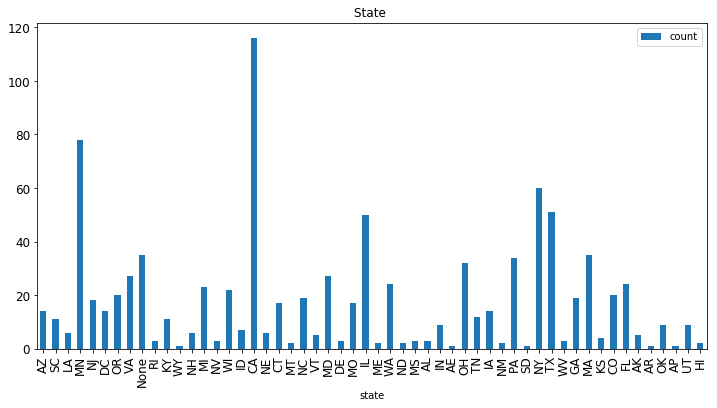

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = GroupByState_pandas_df ['count']  \
            .plot(kind='bar', title ="State ",figsize=(12,6),legend=True, fontsize=12)
plt.show()

In [ ]:
Occupation_df=sqlContext.sql(""" 
SELECT u.occupation ,count(*) counts
FROM user_table u
GROUP BY occupation
""")
Occupation_df.show(30)

+-------------+------+
 occupation|counts|
+-------------+------+
 librarian| 51|
 retired| 14|
 lawyer| 12|
 none| 9|
 writer| 45|
 programmer| 66|
 marketing| 26|
 other| 105|
 executive| 32|
 scientist| 31|
 student| 196|
 salesman| 12|
 artist| 28|
 technician| 27|
administrator| 79|
 engineer| 67|
 healthcare| 16|
 educator| 95|
entertainment| 18|
 homemaker| 7|
 doctor| 7|
+-------------+------+

In [ ]:
Occupation_pandas_df =Occupation_df.toPandas().set_index('occupation')
Occupation_pandas_df

,counts
occupation,
librarian,51
retired,14
lawyer,12
none,9
writer,45
programmer,66
marketing,26
other,105
executive,32


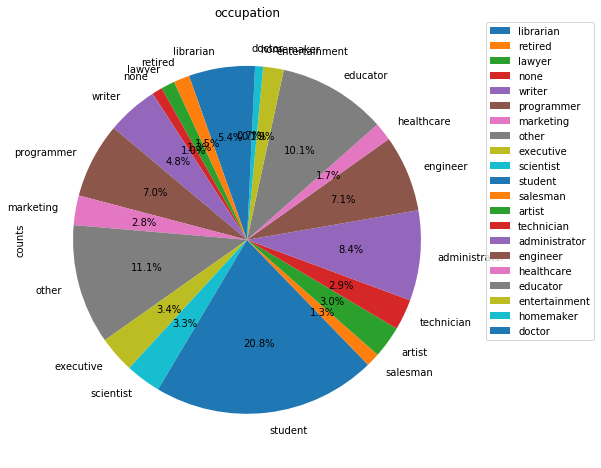

In [ ]:
ax =Occupation_pandas_df['counts'].plot(kind='pie',
           title ="occupation",figsize=(8,8),startangle=90,autopct='%1.1f%%')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()